In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np

In [79]:
path="C://Users//david\Desktop//VU amsterdam//Data mining"
train = pd.read_csv(path+"/Feature_engineering_train.csv")
train.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,...,srch_query_affinity_score,random_bool,click_bool,gross_bookings_usd,booking_bool,starrating_diff,usd_diff,booked_percentage,clicked_percentage,avg_comp_rate
0,0,0,0,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,...,-326.5675,1,0,NaN,0,6.0,1.1,0.000000,1.075269,0.00
1,1,1,1,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,...,-326.5675,1,0,NaN,0,6.0,1.1,0.000000,0.680272,1.00
2,2,2,2,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,...,-326.5675,1,0,NaN,0,6.0,1.1,0.000000,0.000000,0.00
3,3,3,3,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,...,-326.5675,1,0,NaN,0,6.0,1.1,0.000000,0.000000,0.00
4,4,4,4,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,...,-326.5675,1,0,NaN,0,6.0,1.1,3.488372,5.813953,0.75


In [80]:
train= train.drop(["Unnamed: 0","Unnamed: 0.1","Unnamed: 0.1.1"],axis=1)
train

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,srch_query_affinity_score,random_bool,click_bool,gross_bookings_usd,booking_bool,starrating_diff,usd_diff,booked_percentage,clicked_percentage,avg_comp_rate
0,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,7011,2,2.0,...,-326.5675,1,0,NaN,0,6.0,1.1,0.000000,1.075269,0.000000
1,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,8797,2,2.5,...,-326.5675,1,0,NaN,0,6.0,1.1,0.000000,0.680272,1.000000
2,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,14530,3,5.0,...,-326.5675,1,0,NaN,0,6.0,1.1,0.000000,0.000000,0.000000
3,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,15770,2,2.5,...,-326.5675,1,0,NaN,0,6.0,1.1,0.000000,0.000000,0.000000
4,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,20295,3,4.0,...,-326.5675,1,0,NaN,0,6.0,1.1,3.488372,5.813953,0.750000
5,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,22013,3,3.5,...,-326.5675,1,0,NaN,0,6.0,1.1,1.657459,4.972376,0.000000
6,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,25236,4,3.0,...,-326.5675,1,0,NaN,0,6.0,1.1,4.145078,7.772021,0.000000
7,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,27142,4,4.0,...,-326.5675,1,0,NaN,0,6.0,1.1,2.325581,6.201550,0.000000
8,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,31166,2,3.0,...,-326.5675,1,0,NaN,0,6.0,1.1,0.847458,0.847458,0.000000
9,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,31486,4,4.0,...,-326.5675,1,0,NaN,0,6.0,1.1,1.507538,6.030151,0.250000


### Modify the dataset for RandomForest regression and other standard ML algorithm

In [81]:
#Adding Score columns: 5 for booked, 1 clicked and 0 the rest
def assign_score(x):
    if x["booking_bool"]==1:
        val=5
    elif x["click_bool"]==1:
        val=1
    else:
        val=0
    return val
    

train['score'] = train.apply(assign_score , axis=1)


In [82]:
train

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,random_bool,click_bool,gross_bookings_usd,booking_bool,starrating_diff,usd_diff,booked_percentage,clicked_percentage,avg_comp_rate,score
0,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,7011,2,2.0,...,1,0,NaN,0,6.0,1.1,0.000000,1.075269,0.000000,0
1,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,8797,2,2.5,...,1,0,NaN,0,6.0,1.1,0.000000,0.680272,1.000000,0
2,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,14530,3,5.0,...,1,0,NaN,0,6.0,1.1,0.000000,0.000000,0.000000,0
3,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,15770,2,2.5,...,1,0,NaN,0,6.0,1.1,0.000000,0.000000,0.000000,0
4,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,20295,3,4.0,...,1,0,NaN,0,6.0,1.1,3.488372,5.813953,0.750000,0
5,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,22013,3,3.5,...,1,0,NaN,0,6.0,1.1,1.657459,4.972376,0.000000,0
6,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,25236,4,3.0,...,1,0,NaN,0,6.0,1.1,4.145078,7.772021,0.000000,0
7,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,27142,4,4.0,...,1,0,NaN,0,6.0,1.1,2.325581,6.201550,0.000000,0
8,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,31166,2,3.0,...,1,0,NaN,0,6.0,1.1,0.847458,0.847458,0.000000,0
9,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,31486,4,4.0,...,1,0,NaN,0,6.0,1.1,1.507538,6.030151,0.250000,0


In [83]:
#add month columns and drop some useless columns
train["date_time"] = pd.to_datetime(train["date_time"])
train["month"] = train["date_time"].dt.month
column_id=train["srch_id"]
train = train.drop(["srch_id", "date_time"], axis=1)

In [85]:
#columns with Nan
train.columns[train.isna().any()].tolist()

['visitor_hist_starrating', 'visitor_hist_adr_usd', 'gross_bookings_usd']

In [86]:
#fill Nan
train=train.drop("gross_bookings_usd",axis=1)
values = {'visitor_hist_starrating': 0, 'visitor_hist_adr_usd': 0}
train=train.fillna(value=values)

In [87]:
np.all(np.isfinite(train))

False

In [88]:
#there are some infinite values in usd_diff
train= train.replace([np.inf, -np.inf], np.nan)
train.columns[train.isna().any()].tolist()
train=train.fillna(value={"usd_diff":0})

In [140]:
train.head()

,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,random_bool,click_bool,booking_bool,starrating_diff,usd_diff,booked_percentage,clicked_percentage,avg_comp_rate,score,month
0,5,219,0.0,0.0,219,7011,2,2.0,1,2.94,...,1,0,0,6.0,1.1,0.000000,1.075269,0.00,0,1
1,5,219,0.0,0.0,219,8797,2,2.5,1,2.71,...,1,0,0,6.0,1.1,0.000000,0.680272,1.00,0,1
2,5,219,0.0,0.0,219,14530,3,5.0,1,1.61,...,1,0,0,6.0,1.1,0.000000,0.000000,0.00,0,1
3,5,219,0.0,0.0,219,15770,2,2.5,1,2.89,...,1,0,0,6.0,1.1,0.000000,0.000000,0.00,0,1
4,5,219,0.0,0.0,219,20295,3,4.0,1,3.47,...,1,0,0,6.0,1.1,3.488372,5.813953,0.75,0,1


In [90]:
np.all(np.isfinite(train))

True

### separate labels

In [25]:
path="C://Users//david\Desktop//VU amsterdam//Data mining"
train = pd.read_csv(path+"/New_train_set.csv")
train.head()


,Unnamed: 0,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,srch_saturday_night_bool,srch_query_affinity_score,gross_bookings_usd,starrating_diff,usd_diff,booked_percentage,clicked_percentage,avg_comp_rate,month,score
0,0,17,18,129,3.5,157.19,31,2196,4,4.5,...,1,-326.5675,NaN,0.5,0.243081,5.660377,5.660377,0.666667,11,0
1,1,17,18,129,3.5,157.19,31,3309,3,3.5,...,1,-326.5675,NaN,0.5,0.017477,0.000000,6.666667,0.000000,11,0
2,2,17,18,129,3.5,157.19,31,11331,4,4.0,...,1,-326.5675,NaN,0.5,0.289041,5.263158,5.263158,0.000000,11,0
3,3,17,18,129,3.5,157.19,31,17795,4,4.0,...,1,-326.5675,NaN,0.5,0.236977,4.000000,6.000000,1.000000,11,0
4,4,17,18,129,3.5,157.19,31,21770,3,4.5,...,1,-326.5675,NaN,0.5,0.031230,0.000000,7.142857,1.000000,11,0


In [7]:
train.columns

Index(['Unnamed: 0', 'srch_id', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'gross_bookings_usd', 'starrating_diff', 'usd_diff',
       'booked_percentage', 'clicked_percentage', 'avg_comp_rate', 'month',
       'score'],
      dtype='object')

In [27]:
column_id=train["srch_id"]
train=train.drop(["srch_id","Unnamed: 0", "gross_bookings_usd"], axis=1)

In [28]:
y=train["score"]
X=train.drop("score", axis=1)

In [13]:
#X=X.drop("gross_bookings_usd", axis=1)

In [29]:
X.columns[X.isna().any()].tolist()

[]

In [30]:
np.all(np.isfinite(X))

True

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=13 )

In [26]:
regr = RandomForestRegressor(random_state=0, n_estimators=30, n_jobs=-1)
rfr = regr.fit(X_train, y_train)
prediction = rfr.predict(X_test)
print(r2_score(prediction, y_test))


-3.033455626943735


In [1]:
y_test

NameError: name 'y_test' is not defined

In [43]:
prediction_s = pd.Series(prediction)


### ElasticNet

In [21]:
regr = ElasticNet(random_state=0, alpha=5.1506780761681216e-05,l1_ratio=0.4)
y_pred_enet = regr.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print("r^2 on test data : %f" % r2_score_enet)

r^2 on test data : 0.103924


In [19]:
alphas = np.logspace(-5, 1, 60)
enet = ElasticNet(l1_ratio=0.7)
train_errors = list()
test_errors = list()
for alpha in alphas:
    enet.set_params(alpha=alpha)
    enet.fit(X_train, y_train)
    train_errors.append(enet.score(X_train, y_train))
    test_errors.append(enet.score(X_test, y_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

Optimal regularization parameter : 5.1506780761681216e-05


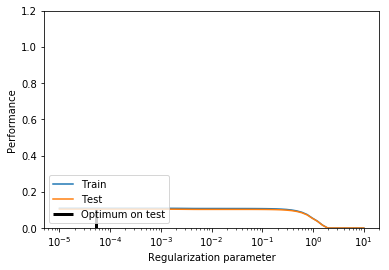

In [22]:
import matplotlib.pyplot as plt
plt.subplot(1, 1, 1)
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')
plt.show()

In [ ]:
#import real test set


### lambdaMART

In [4]:
from sklearn.datasets import dump_svmlight_file
from lambdamart import LambdaMART
from random import randint

In [31]:
#RUND THIS LINE only to save a new file in svm_light format
dump_svmlight_file(X,y,query_id=column_id,zero_based=False, f="C://Users//david\Desktop//VU amsterdam//Data mining"+"/train_forLM_again.txt")


In [94]:
#tran_LM=pd.read_table("C://Users//david\Desktop//VU amsterdam//Data mining/train_forLM.txt")

In [33]:
#function to read the svm_light file and split it in TRAIN and TEST
def get_data(file_loc):
    f_train= open("C://Users//david\Desktop//VU amsterdam//Data mining//train_lm.txt","w+")
    f_test= open("C://Users//david\Desktop//VU amsterdam//Data mining//test_lm.txt","w+")
    f = open(file_loc, 'r')
    test_flag=False
    i=1
    previous_id=0
    for line in f:
        arr = line.split()
        ''' Get the score and query id '''
        score = arr[0]
        q_id = arr[1].split(':')[1]
        #print(q_id)
        if previous_id==0:
            f_train.write(line)
        elif previous_id == q_id:
            if test_flag:
                f_test.write(line)
            else:
                f_train.write(line)
        else:
            if i%3 == 0:
                test_flag=True
                f_test.write(line)
            else:
                test_flag=False
                f_train.write(line)
            i+=1
        previous_id=q_id

    f.close()
    f_train.close()
    f_test.close()
# def get_data(file_loc):
# 	f = open(file_loc, 'r')
# 	data = []
# 	for line in f:
# 		new_arr = []
# 		arr = line.split(' #')[0].split()
# 		''' Get the score and query id '''
# 		score = arr[0]
# 		q_id = arr[1].split(':')[1]
# 		new_arr.append(int(score))
# 		new_arr.append(int(q_id))
# 		arr = arr[2:]
# 		''' Extract each feature from the feature vector '''
# 		for el in arr:
# 			new_arr.append(float(el.split(':')[1]))
# 		data.append(new_arr)
# 	f.close()
# 	return np.array(data)

In [34]:
get_data("C://Users//david\Desktop//VU amsterdam//Data mining/train_forLM_again.txt")


In [5]:
# TO RUN LambdaMART run this code (and the libraries above)
import pyltr
train_lm=open("C://Users//david\Desktop//VU amsterdam//Data mining//train_lm.txt")
test_lm=open("C://Users//david\Desktop//VU amsterdam//Data mining/test_lm.txt")

#TX, Ty, Tqids, _ = pyltr.data.letor.read_dataset(train_lm)
Train_features, Train_scores, Train_qids, _ = pyltr.data.letor.read_dataset(train_lm)
Test_features, Test_scores, Test_qids, _ = pyltr.data.letor.read_dataset(test_lm)

In [6]:
metric = pyltr.metrics.NDCG(k=10)
model = pyltr.models.LambdaMART(
    metric=metric,
    n_estimators=50,
    learning_rate=0.07,
    max_features=0.5,
    query_subsample=0.5,
    max_leaf_nodes=10,
    min_samples_leaf=64,
    verbose=1,
)

In [7]:
#TRAIN
model.fit(Train_features, Train_scores, Train_qids)

 Iter  Train score  OOB Improve    Remaining                           Monitor Output 
    1       0.3942       0.3534       53.85m                                         
    2       0.4628       0.0665       50.28m                                         
    3       0.4915       0.0270       46.10m                                         
    4       0.5059       0.0168       44.99m                                         
    5       0.5193       0.0104       43.16m                                         
    6       0.5232       0.0023       41.51m                                         
    7       0.5280       0.0040       45.11m                                         
    8       0.5287       0.0018       45.46m                                         
    9       0.5330       0.0034       45.82m                                         
   10       0.5319       0.0013       45.49m                                         
   15       0.5454       0.0033       36.97m         

In [23]:
Epred = model.predict(Test_features)
print ('Random ranking:', metric.calc_mean_random(Test_qids, Test_scores))
print ('Our model:', metric.calc_mean(Test_qids, Test_scores, Epred))

Random ranking: 0.22850953539318647
Our model: 0.5680370869528044


In [24]:
Epred

array([-0.1484142 ,  1.14482062, -0.52588722, ..., -0.02895467,
       -0.83267956,  1.47147386])

#### Extracting data from train (percentage book/click) and store it

In [8]:
path="C://Users//david\Desktop//VU amsterdam//Data mining"
train = pd.read_csv(path+"/training_set_VU_DM.csv")
train.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [40]:
hotel_quality = pd.DataFrame(train.prop_id.value_counts(dropna = False))
hotel_quality = hotel_quality.join(pd.DataFrame(train.prop_id[train.booking_bool == 1].value_counts().astype(int)), rsuffix = "book")
hotel_quality = hotel_quality.join(pd.DataFrame(train.prop_id[train.click_bool == 1].value_counts().astype(int)), rsuffix = "click")
hotel_quality.columns = ["counts", "booked", "clicked"]
hotel_quality["booked_percentage"] = hotel_quality.booked / hotel_quality.counts * 100
hotel_quality["clicked_percentage"] = hotel_quality.clicked / hotel_quality.counts * 100

In [41]:
hotel_quality = hotel_quality.fillna(value = {"booked_percentage": 0, "clicked_percentage": 0})


In [43]:
hotel_quality=hotel_quality.drop(["counts", "booked", "clicked"], axis=1)

In [46]:
hotel_quality.to_csv(path+"/hotel_quality.csv")

In [ ]:
hotel_quality.max()

### test on the test dataset to insert hotels_train quality

In [15]:
#load test set
test = pd.read_csv(path+"/test_set_VU_DM.csv")
test.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
0,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,3180,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,5543,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,14142,2,3.5,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,22393,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,24194,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
hotels_train = pd.read_csv(path+"//hotel_quality.csv")
hotels_train.columns=["prop_id", "booked_perc", "clicked_perc"]

In [57]:
new_data_test = test.join(hotels_train.set_index("prop_id"),how="left", on="prop_id")

### How many hotels are in test but not in train? -> 121665 out of 129438

In [34]:
hotel_quality_test.index

Int64Index([104517, 124342,  68420, 134154,  59781,  40279, 137997,  60846,
            116942,  49656,
            ...
             88165,   2915,  99234, 122755,  41332,   6221,  15205,  29038,
             24940,  82669],
           dtype='int64', length=129438)

In [33]:
hotel_quality_test.index.intersection(hotel_quality.index)

Int64Index([104517, 124342,  68420, 134154,  59781,  40279, 137997,  60846,
            116942,  49656,
            ...
            133923,  76615,  93007,  62348,  77677,  88165,  99234,  41332,
             29038,  24940],
           dtype='int64', length=121665)

### Test on real test set

In [8]:
path="C://Users//david\Desktop//VU amsterdam//Data mining"
new_test_set = pd.read_csv(path+"/New_test_set.csv")
new_test_set.head()

,Unnamed: 0,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,random_bool,starrating_diff,usd_diff,booked_perc,clicked_perc,avg_comp_rate,month
0,0,1,24,216,3.43,151.39,219,3180,3,4.5,...,1,0,-326.5675,0,0.43,0.104550,4.301075,4.301075,0.0,2
1,1,1,24,216,3.43,151.39,219,5543,3,4.5,...,1,0,-326.5675,0,0.43,0.108215,5.327869,6.147541,0.0,2
2,2,1,24,216,3.43,151.39,219,14142,2,3.5,...,1,0,-326.5675,0,1.43,0.489901,1.342282,2.684564,0.5,2
3,3,1,24,216,3.43,151.39,219,22393,3,4.5,...,1,0,-326.5675,0,0.43,0.024761,1.379310,1.379310,0.0,2
4,4,1,24,216,3.43,151.39,219,24194,3,4.5,...,1,0,-326.5675,0,0.43,0.282470,1.463415,1.951220,0.0,2


In [10]:
new_test_set

,Unnamed: 0,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,random_bool,starrating_diff,usd_diff,booked_perc,clicked_perc,avg_comp_rate,month
0,0,1,24,216,3.43,151.39,219,3180,3,4.5,...,1,0,-326.5675,0,0.43,0.104550,4.301075,4.301075,0.000000,2
1,1,1,24,216,3.43,151.39,219,5543,3,4.5,...,1,0,-326.5675,0,0.43,0.108215,5.327869,6.147541,0.000000,2
2,2,1,24,216,3.43,151.39,219,14142,2,3.5,...,1,0,-326.5675,0,1.43,0.489901,1.342282,2.684564,0.500000,2
3,3,1,24,216,3.43,151.39,219,22393,3,4.5,...,1,0,-326.5675,0,0.43,0.024761,1.379310,1.379310,0.000000,2
4,4,1,24,216,3.43,151.39,219,24194,3,4.5,...,1,0,-326.5675,0,0.43,0.282470,1.463415,1.951220,0.000000,2
5,5,1,24,216,3.43,151.39,219,28181,3,4.5,...,1,0,-326.5675,0,0.43,0.255043,7.500000,8.055556,0.000000,2
6,6,1,24,216,3.43,151.39,219,34263,3,4.5,...,1,0,-326.5675,0,0.43,0.282470,3.208556,3.208556,0.000000,2
7,7,1,24,216,3.43,151.39,219,37567,2,4.5,...,1,0,-326.5675,0,1.43,0.460766,1.257862,1.257862,1.000000,2
8,8,1,24,216,3.43,151.39,219,50162,2,3.5,...,1,0,-326.5675,0,1.43,0.481214,3.424658,4.109589,-0.500000,2
9,9,1,24,216,3.43,151.39,219,54937,3,4.0,...,1,0,-326.5675,0,0.43,0.259452,5.089059,5.852417,0.000000,2


In [11]:
#new_test_set = new_test_set.fillna(value = {"booked_perc": 2.89, "clicked_perc": 5.01})
new_test_set = new_test_set.drop("Unnamed: 0", axis=1)
new_test_set

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,random_bool,starrating_diff,usd_diff,booked_perc,clicked_perc,avg_comp_rate,month
0,1,24,216,3.43,151.39,219,3180,3,4.5,1,...,1,0,-326.5675,0,0.43,0.104550,4.301075,4.301075,0.000000,2
1,1,24,216,3.43,151.39,219,5543,3,4.5,1,...,1,0,-326.5675,0,0.43,0.108215,5.327869,6.147541,0.000000,2
2,1,24,216,3.43,151.39,219,14142,2,3.5,1,...,1,0,-326.5675,0,1.43,0.489901,1.342282,2.684564,0.500000,2
3,1,24,216,3.43,151.39,219,22393,3,4.5,1,...,1,0,-326.5675,0,0.43,0.024761,1.379310,1.379310,0.000000,2
4,1,24,216,3.43,151.39,219,24194,3,4.5,1,...,1,0,-326.5675,0,0.43,0.282470,1.463415,1.951220,0.000000,2
5,1,24,216,3.43,151.39,219,28181,3,4.5,1,...,1,0,-326.5675,0,0.43,0.255043,7.500000,8.055556,0.000000,2
6,1,24,216,3.43,151.39,219,34263,3,4.5,1,...,1,0,-326.5675,0,0.43,0.282470,3.208556,3.208556,0.000000,2
7,1,24,216,3.43,151.39,219,37567,2,4.5,0,...,1,0,-326.5675,0,1.43,0.460766,1.257862,1.257862,1.000000,2
8,1,24,216,3.43,151.39,219,50162,2,3.5,1,...,1,0,-326.5675,0,1.43,0.481214,3.424658,4.109589,-0.500000,2
9,1,24,216,3.43,151.39,219,54937,3,4.0,1,...,1,0,-326.5675,0,0.43,0.259452,5.089059,5.852417,0.000000,2


In [12]:
new_test_set = new_test_set.drop("random_bool", axis=1)
new_test_set

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,starrating_diff,usd_diff,booked_perc,clicked_perc,avg_comp_rate,month
0,1,24,216,3.43,151.39,219,3180,3,4.5,1,...,0,1,0,-326.5675,0.43,0.104550,4.301075,4.301075,0.000000,2
1,1,24,216,3.43,151.39,219,5543,3,4.5,1,...,0,1,0,-326.5675,0.43,0.108215,5.327869,6.147541,0.000000,2
2,1,24,216,3.43,151.39,219,14142,2,3.5,1,...,0,1,0,-326.5675,1.43,0.489901,1.342282,2.684564,0.500000,2
3,1,24,216,3.43,151.39,219,22393,3,4.5,1,...,0,1,0,-326.5675,0.43,0.024761,1.379310,1.379310,0.000000,2
4,1,24,216,3.43,151.39,219,24194,3,4.5,1,...,0,1,0,-326.5675,0.43,0.282470,1.463415,1.951220,0.000000,2
5,1,24,216,3.43,151.39,219,28181,3,4.5,1,...,0,1,0,-326.5675,0.43,0.255043,7.500000,8.055556,0.000000,2
6,1,24,216,3.43,151.39,219,34263,3,4.5,1,...,0,1,0,-326.5675,0.43,0.282470,3.208556,3.208556,0.000000,2
7,1,24,216,3.43,151.39,219,37567,2,4.5,0,...,0,1,0,-326.5675,1.43,0.460766,1.257862,1.257862,1.000000,2
8,1,24,216,3.43,151.39,219,50162,2,3.5,1,...,0,1,0,-326.5675,1.43,0.481214,3.424658,4.109589,-0.500000,2
9,1,24,216,3.43,151.39,219,54937,3,4.0,1,...,0,1,0,-326.5675,0.43,0.259452,5.089059,5.852417,0.000000,2


In [13]:
new_test_set.columns[new_test_set.isna().any()].tolist()

[]

In [14]:
column_id=new_test_set["srch_id"]
X=new_test_set.drop("srch_id", axis=1)
X

,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,starrating_diff,usd_diff,booked_perc,clicked_perc,avg_comp_rate,month
0,24,216,3.43,151.39,219,3180,3,4.5,1,2.94,...,0,1,0,-326.5675,0.43,0.104550,4.301075,4.301075,0.000000,2
1,24,216,3.43,151.39,219,5543,3,4.5,1,2.64,...,0,1,0,-326.5675,0.43,0.108215,5.327869,6.147541,0.000000,2
2,24,216,3.43,151.39,219,14142,2,3.5,1,2.71,...,0,1,0,-326.5675,1.43,0.489901,1.342282,2.684564,0.500000,2
3,24,216,3.43,151.39,219,22393,3,4.5,1,2.40,...,0,1,0,-326.5675,0.43,0.024761,1.379310,1.379310,0.000000,2
4,24,216,3.43,151.39,219,24194,3,4.5,1,2.94,...,0,1,0,-326.5675,0.43,0.282470,1.463415,1.951220,0.000000,2
5,24,216,3.43,151.39,219,28181,3,4.5,1,2.30,...,0,1,0,-326.5675,0.43,0.255043,7.500000,8.055556,0.000000,2
6,24,216,3.43,151.39,219,34263,3,4.5,1,3.09,...,0,1,0,-326.5675,0.43,0.282470,3.208556,3.208556,0.000000,2
7,24,216,3.43,151.39,219,37567,2,4.5,0,2.83,...,0,1,0,-326.5675,1.43,0.460766,1.257862,1.257862,1.000000,2
8,24,216,3.43,151.39,219,50162,2,3.5,1,2.20,...,0,1,0,-326.5675,1.43,0.481214,3.424658,4.109589,-0.500000,2
9,24,216,3.43,151.39,219,54937,3,4.0,1,2.08,...,0,1,0,-326.5675,0.43,0.259452,5.089059,5.852417,0.000000,2


In [19]:
y = [randint(0, 5) for p in range(0, 4959183)]
#X.columns

In [20]:
len(y)

4959183

In [32]:
#np.all(np.isfinite(X))
#X= X.replace([np.inf, -np.inf], np.nan)
#X = X.fillna(value = {"month": 1,"avg_comp_rate": 0}) 
#X.columns[X.isna().any()].tolist()


[]

In [17]:
#X= X.replace(-np.Inf, np.nan)
np.all(np.isfinite(X))

True

In [21]:
dump_svmlight_file(X,y,query_id=column_id,zero_based=False, f="C://Users//david\Desktop//VU amsterdam//Data mining//Preprocessed_test_set.txt")

In [22]:
real_test_lm=open("C://Users//david\Desktop//VU amsterdam//Data mining/Preprocessed_test_set.txt")
Test_features_r, Test_scores_r, Test_qids_r, _ = pyltr.data.letor.read_dataset(real_test_lm)
real_test_lm.close()


In [26]:
len(Test_features_r)

4959183

In [27]:
# PREDICT REAL DEAL
Epred_r = model.predict(Test_features_r)

In [30]:
Epred_r

array([-2.27310002, -2.0716901 , -2.2103039 , ..., -2.7949341 ,
       -1.73889549, -1.83400341])

In [31]:
np.savetxt("Predictions.txt", Epred_r, fmt='%f')

In [2]:
#predictions_real= np.loadtxt("Predictions.txt" )

array([-2.360178, -2.195714, -2.466269, ..., -2.252612, -2.029815,
       -2.297421])